## Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Effect of Normalization, Feature, Extraction and Distance Metrics


### Loading the Data

In [ ]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])
#Copy of the data stored in norm_wine 
norm_wine = pd.concat([wine_w,wine_r])

In [ ]:
wine[D].describe()
wine[D].tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0

In [ ]:
wine[DLC].describe()
wine[DLC].tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  color  
1594     10.5        5    1.0  
1595     11.2        6    1.0  
1596     11.0        6    1.0  
1597     10.2        5    1.0  
1598     11.0        6    1.0

### Train/Test Datasplit

In [ ]:
X = wine[D].values
y = np.ravel(wine[C])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

### None Normalization scatter plot of the Data (Label - Color)

C:\Users\15483\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\15483\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


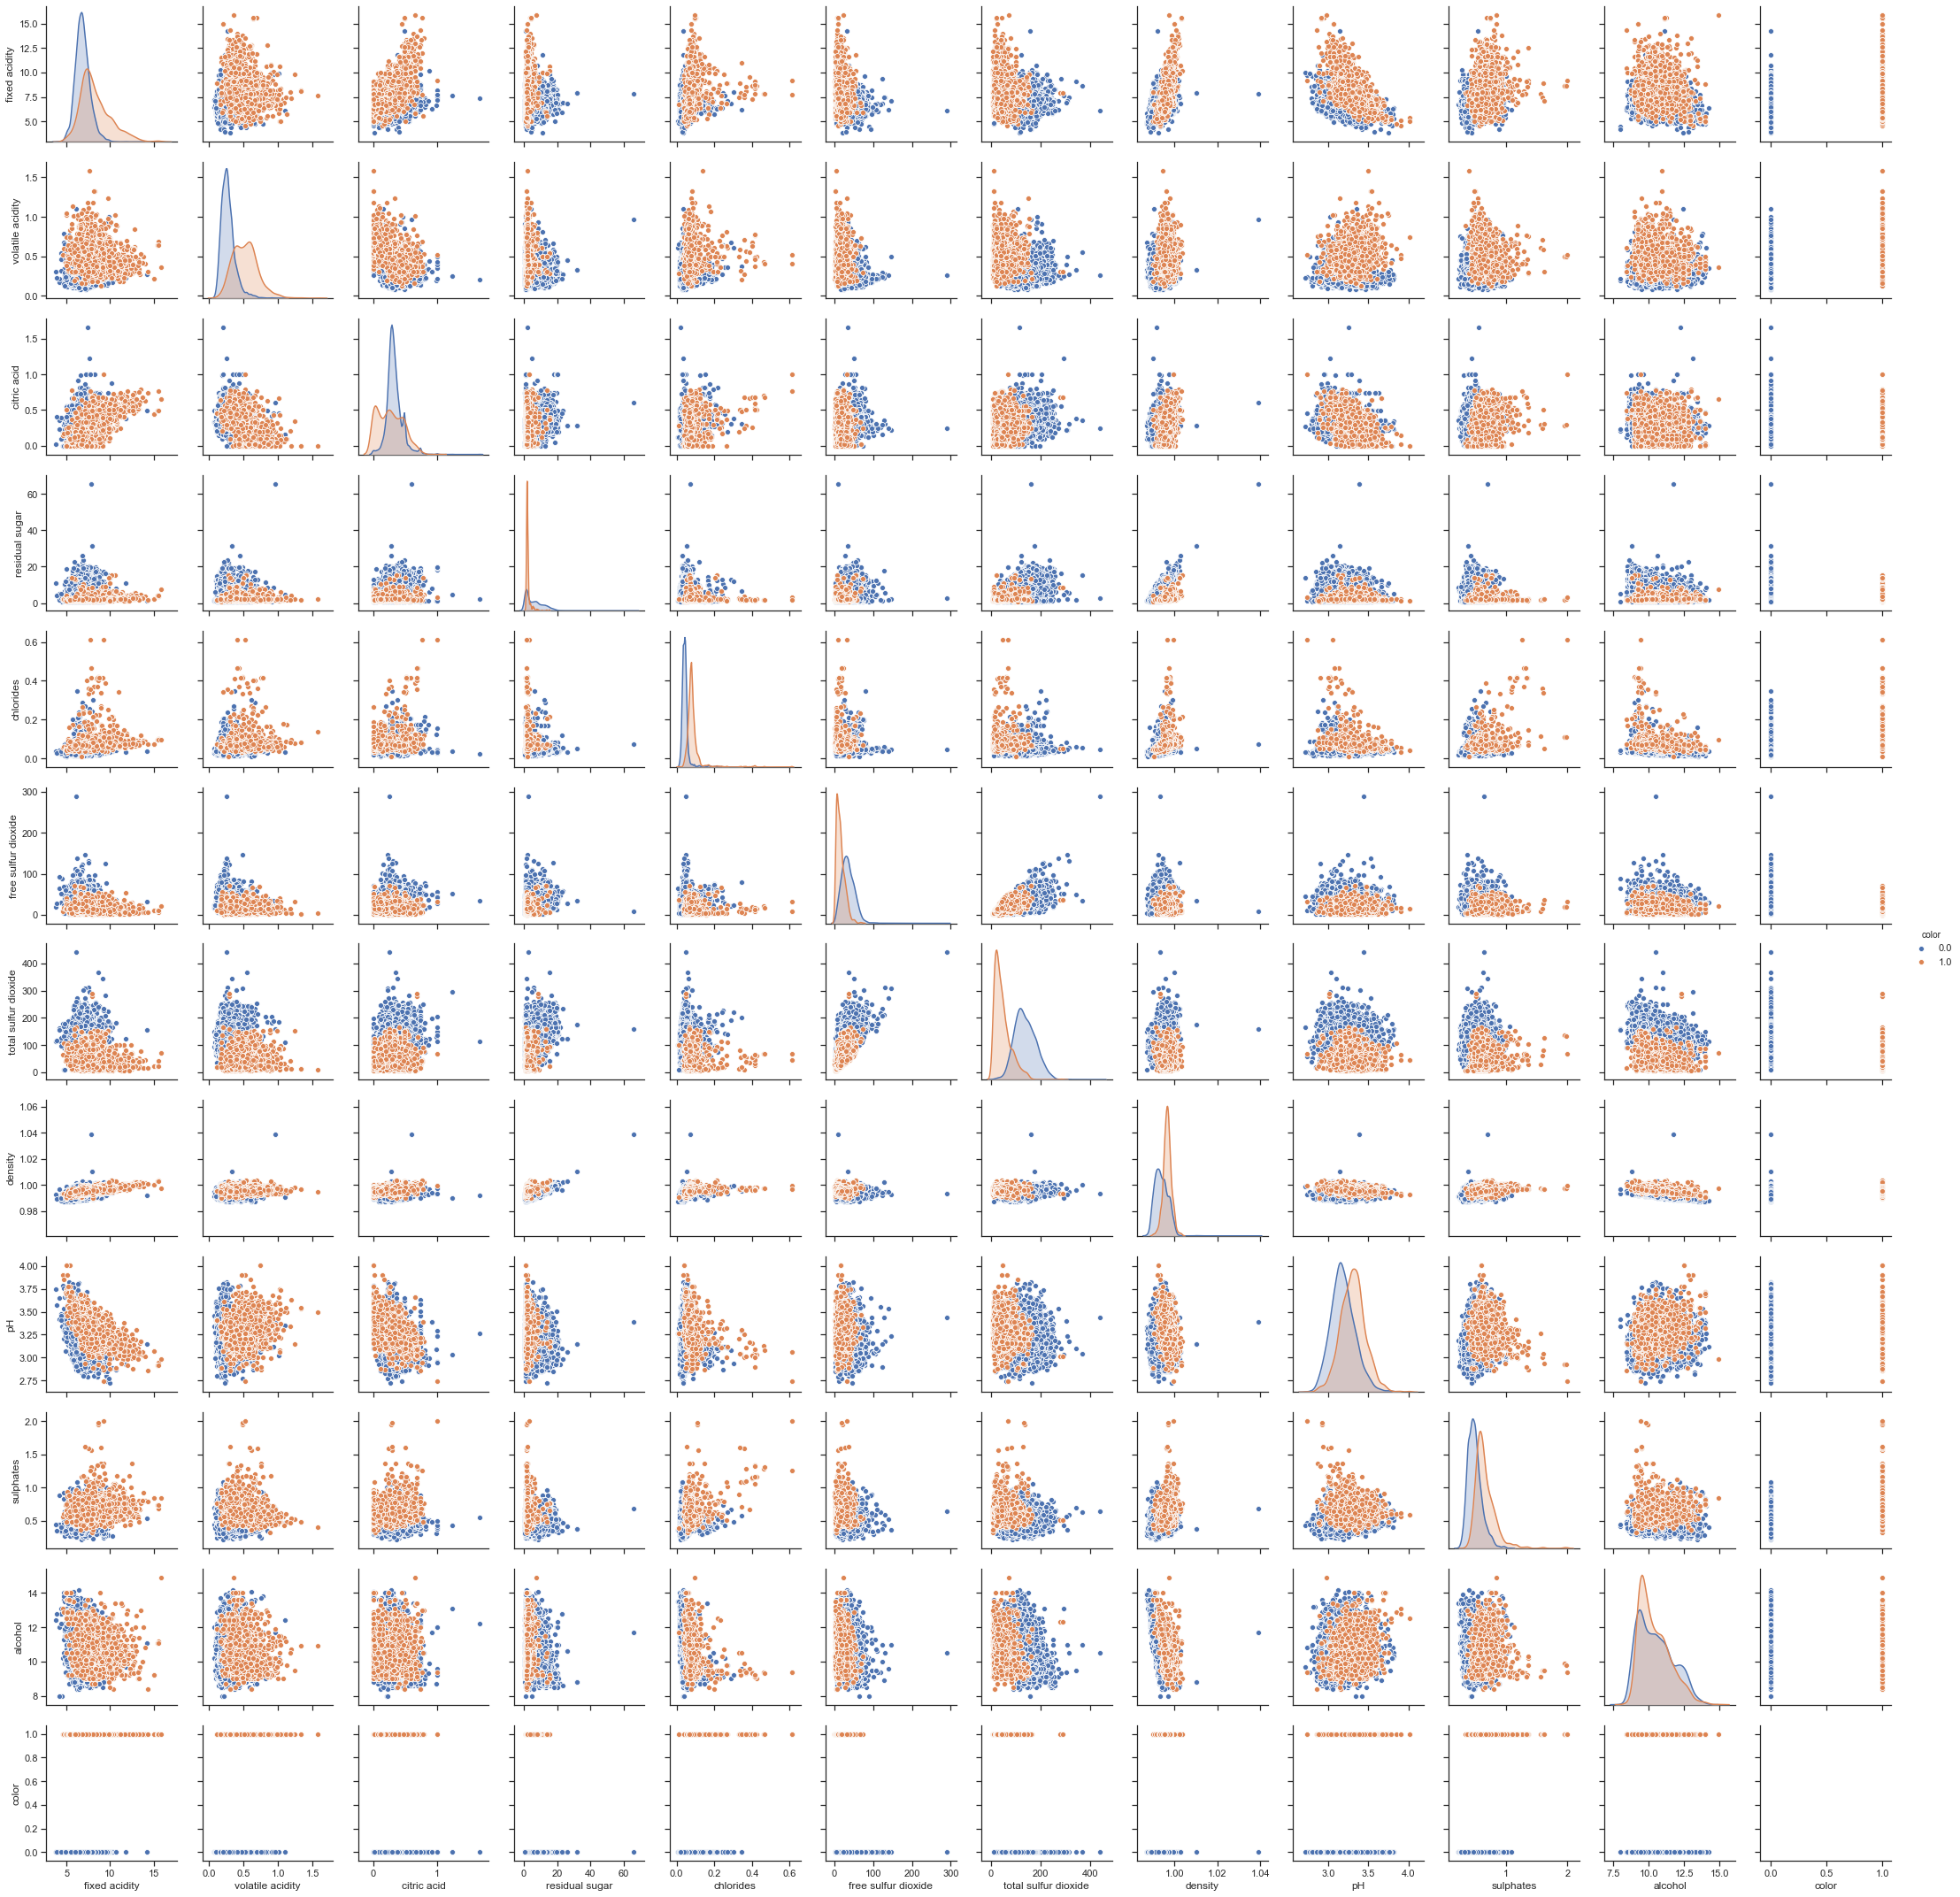

In [ ]:
g = sns.pairplot(wine[DC], hue="color")

### z-score Normalization scatter plot (Label - Color)

**Normalizing the data**

In [ ]:
scaler = preprocessing.StandardScaler().fit(wine[D])
norm_wine[D]= scaler.transform(wine[D])
norm_wine[D]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1         -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2          0.682458         -0.362438     0.559966        0.306208  -0.172244   
3         -0.011808         -0.666161     0.009406        0.642523   0.056126   
4         -0.011808         -0.666161     0.009406        0.642523   0.056126   
...             ...               ...          ...             ...        ...   
1594      -0.783214          1.581387    -1.642273       -0.723758   0.969605   
1595      -1.014636          1.277665    -1.504633       -0.681719   0.170311   
1596      -0.706073          1.034686    -1.298173       -0.660699   0.569958   
1597      -1.014636          1.854738    -1.366993       -0.723758   0.541412   
1598      -0.937495         -0.180205     1.041706       -0.387443   0.313042   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.815565              0.959976  2.102214 -1.359049   
1               -0.931107              0.287618 -0.232332  0.506915   
2               -0.029599             -0.331660  0.134525  0.258120   
3                0.928254              1.243074  0.301278 -0.177272   
4                0.928254              1.243074  0.301278 -0.177272   
...                   ...                   ...       ...       ...   
1594             0.083090             -1.269422  0.067824  1.439897   
1595             0.477500             -1.145567  0.141195  1.875288   
1596            -0.085943             -1.340197  0.347969  1.253300   
1597             0.083090             -1.269422  0.257923  2.186282   
1598            -0.705730             -1.304809  0.264593  1.066704   

      sulphates   alcohol  
0     -0.546178 -1.418558  
1     -0.277351 -0.831615  
2     -0.613385 -0.328521  
3     -0.882212 -0.496219  
4     -0.882212 -0.496219  
...         ...       ...  
1594   0.327510  0.006875  
1595   1.537233  0.593818  
1596   1.470026  0.426120  
1597   1.201199 -0.244672  
1598   0.865165  0.426120  

[6497 rows x 11 columns]

C:\Users\15483\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\15483\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


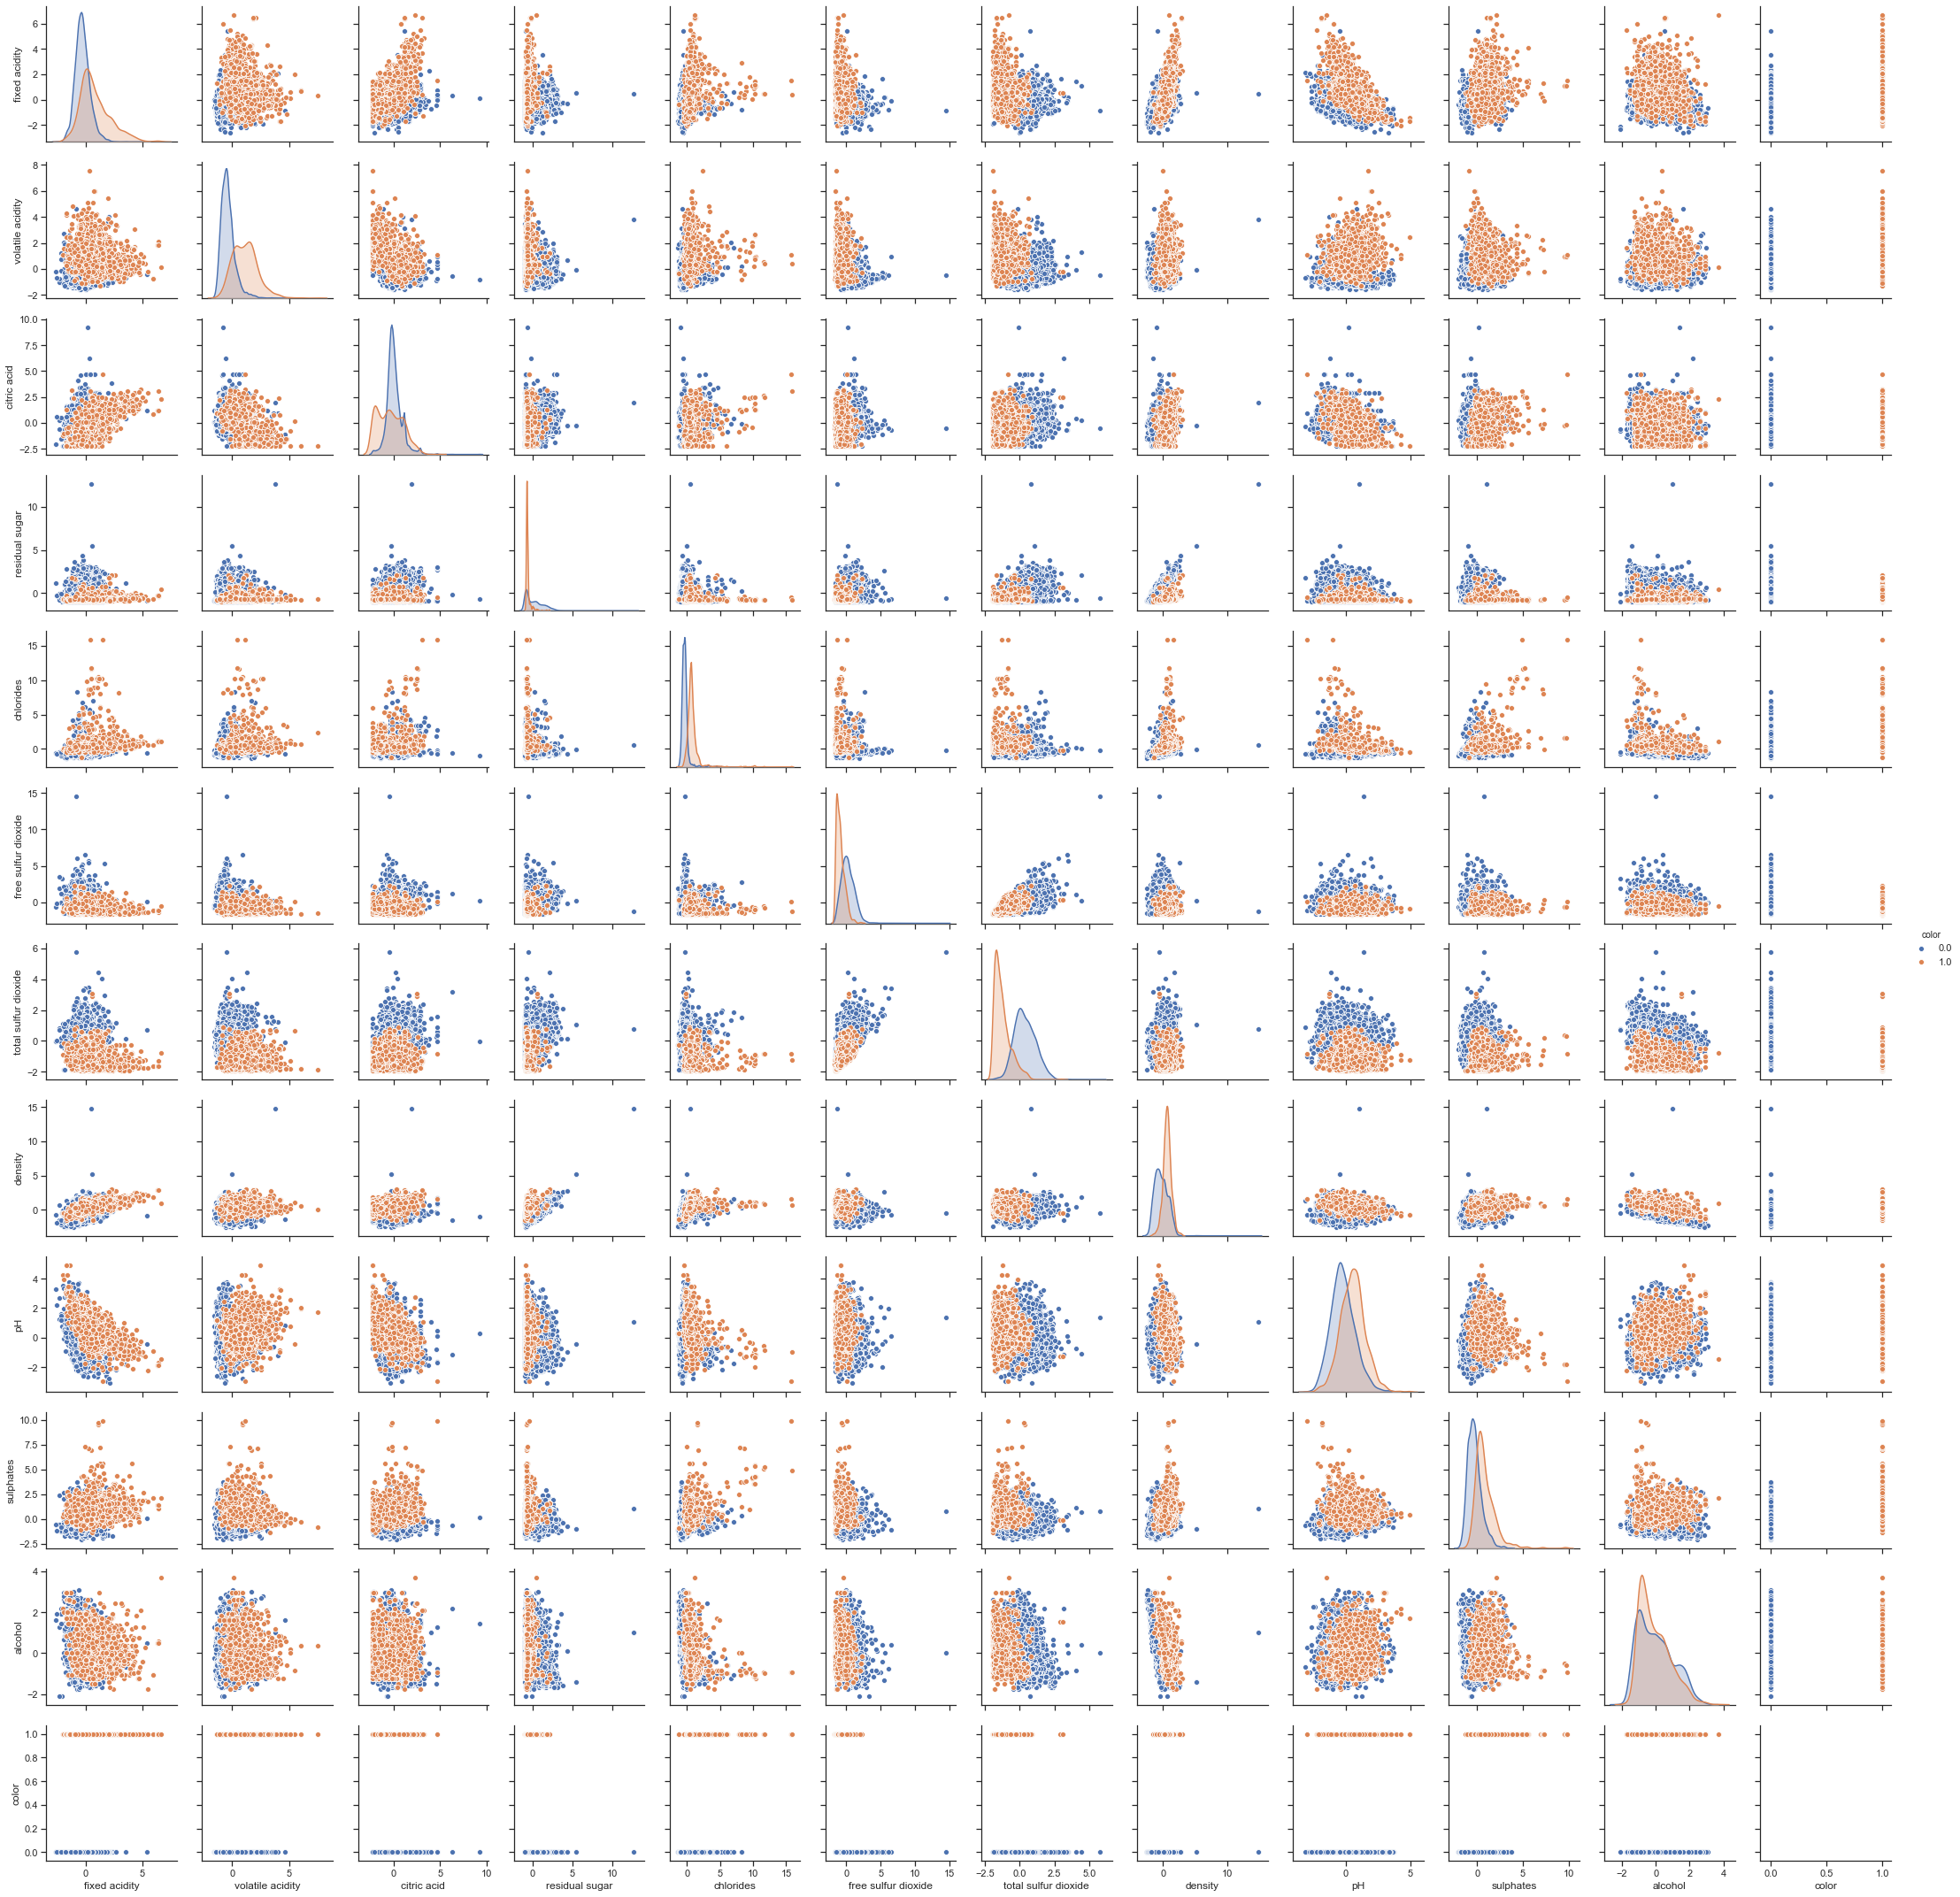

In [ ]:
g = sns.pairplot(norm_wine[DC], hue="color")

**Text answer: (markdown cell)**

**Effect of Normalization on the data**

--As observed the relation between features is not affected due to normalization and visually there is no much variation in the plots before and after normalisation. The only difference seen, is that the **scaling** of the features has reduced.

**Interpretation of the separability of the two classes(red wine and white wine) in terms of different features**

**--Analysis Based on Histogram Plots**

When analyzing the observed histogram, we can observe that 
1. Whenever chlorides, free sulfur dioxide and total sulfur dioxide features are considered we can see that there is a better classification of the data.
Among the three the least overlap is seen when **total sulfur dioxide** feature is considered, so it classifies the two classes of wine better than the other features.
But considering chlorides wouldn't be feasible because though the overlap is less, the spread of data of the two classes is less and very close to each other.
2. Residual sugar histogram gives us a visual representation that it's content in red wine is almost consistent throughout when compared to its  content in white wine.

**--Analysis Based on Scatter Plots**

When analyzing the scatterplots we see a similar dependency of classification on total sulfur dioxide feature as seen in histogram plots, we see that when total sulfur dioxide feature is considered, the categorization is easier.

**"Therefore the best way to classify the wine  dataset is by using the total sulfur dioxide feature"**


### Classification (Label - Color)

### Normalizing the data after splitting
Without Normalization - I split the whole data into train and test in 80:20 ratio.

With Normaization - First split the entire dataset into train and test and then fit the train data for normalisation and using this fit transform the train and test data.

In [ ]:
X_class = wine[D].values
y_class = np.ravel(wine[C])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state = ran) 

In [ ]:
scaler = StandardScaler()
X_train_norm= scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_test_norm

array([[-0.1721767 , -0.54303355,  0.90013042, ..., -0.3632329 ,
        -0.35397899,  1.17959322],
       [ 0.28671589, -1.20685476,  2.89879498, ..., -0.92217133,
        -0.88363531,  0.256953  ],
       [-0.78403347, -1.14650738, -0.34042   , ..., -0.61164998,
        -1.01604939, -1.16894553],
       ...,
       [ 0.51616218, -0.12060187,  1.31364722, ..., -1.10848414,
         3.61844342, -1.08506915],
       [ 0.21023379,  1.14669317, -1.78772882, ...,  1.00306103,
         0.37429845,  0.17307661],
       [ 0.05726959,  1.0259984 , -0.96069521, ...,  1.87252081,
         1.30119701, -0.83343999]])

### KNN Classification using uniform, Euclidean, Manhattan data point weighting schemes

In [ ]:
n_neighborslist = list(range(1,50))
col_names=['Uniform','Uniform_norm','Manhattan','Manhattan_norm','Euclidean','Euclidean_norm']
accarray = np.zeros((len(n_neighborslist),len(col_names)))
weight1 = [['uniform', 2],['distance',1], ['distance',2]]
acc=pd.DataFrame(accarray, columns=col_names)
for j in range(len(weight1)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh_norm = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh.fit(X_train, y_train)
        neigh_norm.fit(X_train_norm, y_train)
        y_pred = neigh.predict(X_test)
        y_pred_norm = neigh_norm.predict(X_test_norm)
        accscore = accuracy_score(y_test, y_pred)
        accscore_norm = accuracy_score(y_test, y_pred_norm)
        if j==0:
            index=j
        acc.at[k,col_names[index]] = accscore
        acc.at[k,col_names[index+1]] = accscore_norm
    index=index+2

In [ ]:
acc[1:].describe()

Uniform  Uniform_norm  Manhattan  Manhattan_norm  Euclidean  \
count  49.000000     49.000000  49.000000       49.000000  49.000000   
mean    0.927111      0.990848   0.953218        0.995463   0.943422   
std     0.005409      0.001424   0.004365        0.000958   0.003837   
min     0.922308      0.988462   0.946154        0.993846   0.939231   
25%     0.923846      0.990000   0.949231        0.994615   0.940769   
50%     0.924615      0.990769   0.953077        0.995385   0.941538   
75%     0.929231      0.990769   0.956154        0.996154   0.946923   
max     0.950000      0.995385   0.961538        0.996923   0.951538   

       Euclidean_norm  
count       49.000000  
mean         0.992072  
std          0.001343  
min          0.990769  
25%          0.990769  
50%          0.991538  
75%          0.992308  
max          0.996154

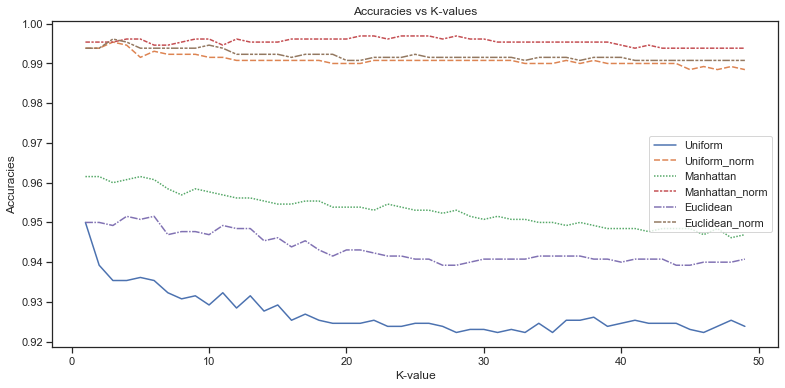

In [ ]:
plt.figure(figsize =(13,6))
plt.title("Accuracies vs K-values")
plt.xlabel("K-value")
plt.ylabel("Accuracies")
s = sns.lineplot(data=acc[1:])

**From the above plot it is observed that manhattan with normalized data(z-score normalization) gives the best accuracy.**

### Feature Extraction using PCA 

In [ ]:
%%time
from sklearn.decomposition import PCA
pca_color = PCA(n_components=5)
pca_color.fit(X_train)
pca_train = pca_color.transform(X_train)
pca_test = pca_color.transform(X_test)
pca_norm = PCA(n_components=5)
pca_norm.fit(X_train_norm)
pca_norm_train = pca_norm.transform(X_train_norm)
pca_norm_test = pca_norm.transform(X_test_norm)

Wall time: 283 ms


In [ ]:
n_neighborslist = list(range(1,50))
col_names=['Uniform','Uniform_norm','Manhattan','Manhattan_norm','Euclidean','Euclidean_norm']
accarray_norm = np.zeros((len(n_neighborslist),len(col_names)))
weight_norm = [['uniform', 2],['distance',1], ['distance',2]]
acc_pca=pd.DataFrame(accarray_norm, columns=col_names)
for j in range(len(weight_norm)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_norm[j][0], p=weight_norm[j][1])
        neigh_norm = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_norm[j][0], p=weight_norm[j][1])
        neigh.fit(pca_train, y_train)
        neigh_norm.fit(pca_norm_train, y_train)
        y_pred = neigh.predict(pca_test)
        y_pred_norm = neigh_norm.predict(pca_norm_test)
        accscore = accuracy_score(y_test, y_pred)
        accscore_norm = accuracy_score(y_test, y_pred_norm)
        if j==0:
            index=j
        acc_pca.at[k,col_names[index]] = accscore
        acc_pca.at[k,col_names[index+1]] = accscore_norm
    index=index+2

In [ ]:
acc_pca[1:].describe()

Uniform  Uniform_norm  Manhattan  Manhattan_norm  Euclidean  \
count  49.000000     49.000000  49.000000       49.000000  49.000000   
mean    0.926719      0.986750   0.949890        0.988634   0.943030   
std     0.004731      0.001641   0.003408        0.000878   0.003620   
min     0.922308      0.983077   0.945385        0.987692   0.939231   
25%     0.923846      0.986154   0.946923        0.988462   0.940769   
50%     0.924615      0.986923   0.950000        0.988462   0.941538   
75%     0.927692      0.988462   0.953077        0.988462   0.945385   
max     0.945385      0.991538   0.956923        0.991538   0.951538   

       Euclidean_norm  
count       49.000000  
mean         0.988776  
std          0.001120  
min          0.986923  
25%          0.987692  
50%          0.988462  
75%          0.989231  
max          0.992308

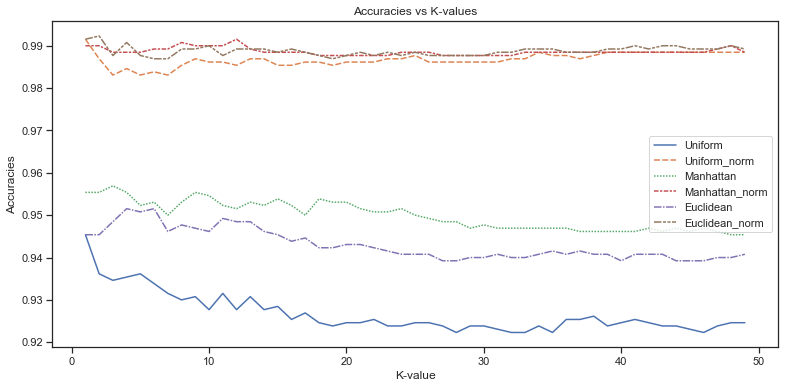

In [ ]:
plt.figure(figsize =(13,6))
plt.title("Accuracies vs K-values")
plt.xlabel("K-value")
plt.ylabel("Accuracies")
s = sns.lineplot(data=acc_pca[1:])

### Feature Extraction using LDA

In [ ]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_color = LDA()
lda_color.fit(X_train,y_train)
lda_train = lda_color.transform(X_train)
lda_test = lda_color.transform(X_test)
lda_norm = LDA()
lda_norm.fit(X_train_norm,y_train)
lda_norm_train = lda_norm.transform(X_train_norm)
lda_norm_test = lda_norm.transform(X_test_norm)

Wall time: 142 ms


In [ ]:
n_neighborslist = list(range(1,50))
col_names=['Uniform','Uniform_norm','Manhattan','Manhattan_norm','Euclidean','Euclidean_norm']
accarray_norm = np.zeros((len(n_neighborslist),len(col_names)))
weight_norm = [['uniform', 2],['distance',1], ['distance',2]]
acc_lda=pd.DataFrame(accarray_norm, columns=col_names)
for j in range(len(weight_norm)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_norm[j][0], p=weight_norm[j][1])
        neigh_norm = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_norm[j][0], p=weight_norm[j][1])
        neigh.fit(lda_train, y_train)
        neigh_norm.fit(lda_norm_train, y_train)
        y_pred = neigh.predict(lda_test)
        y_pred_norm = neigh_norm.predict(lda_norm_test)
        accscore = accuracy_score(y_test, y_pred)
        accscore_norm = accuracy_score(y_test, y_pred_norm)
        if j==0:
            index=j
        acc_lda.at[k,col_names[index]] = accscore
        acc_lda.at[k,col_names[index+1]] = accscore_norm
    index=index+2

In [ ]:
acc_lda[1:].describe()

Uniform  Uniform_norm  Manhattan  Manhattan_norm  Euclidean  \
count  49.000000     49.000000  49.000000       49.000000  49.000000   
mean    0.993956      0.993956   0.992622        0.992622   0.992622   
std     0.000566      0.000566   0.000382        0.000382   0.000382   
min     0.992308      0.992308   0.992308        0.992308   0.992308   
25%     0.993846      0.993846   0.992308        0.992308   0.992308   
50%     0.993846      0.993846   0.992308        0.992308   0.992308   
75%     0.994615      0.994615   0.993077        0.993077   0.993077   
max     0.994615      0.994615   0.993077        0.993077   0.993077   

       Euclidean_norm  
count       49.000000  
mean         0.992622  
std          0.000382  
min          0.992308  
25%          0.992308  
50%          0.992308  
75%          0.993077  
max          0.993077

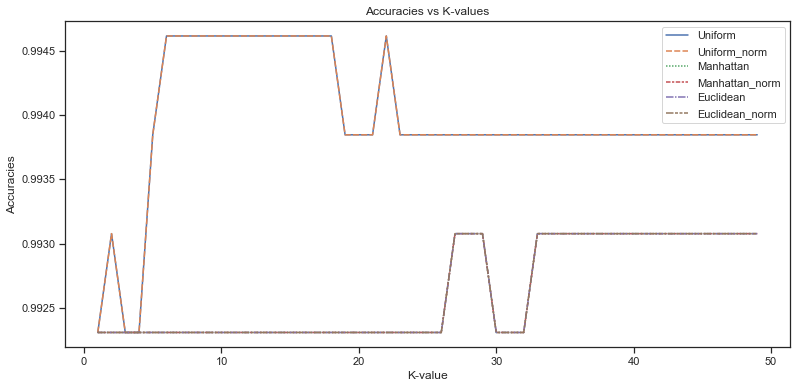

In [ ]:
plt.figure(figsize =(13,6))
plt.title("Accuracies vs K-values")
plt.xlabel("K-value")
plt.ylabel("Accuracies")
s = sns.lineplot(data=acc_lda[1:])

**Feature Extraction Analysis**<br>
1.It is observed from the accuracy plot of PCA that Manhattan + z_norm has the best accuracy<br>
2.It is observed from the accuracy plot of LDA that there is no difference in accuracy with or without normalization<br>
3.The accuracies obtained from LDA is greater than that of PCA.<br>
4.When considered time as a factor,we can observe that the time taken by LDA is more compared to PCA.<br>
  --For LDA =<br>
  --For PCA =

### Analysis and Discussion:

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidit

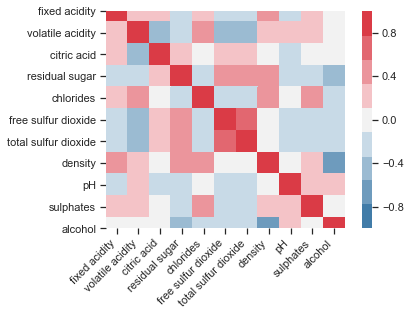

In [ ]:
#Correlation between features
cor = norm_wine[D].corr()
print(cor)
hm = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True
)
hm.set_xticklabels(
    hm.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

+ **k Plots:** Plotted and analyzed in Classification section.
+ **Features:**<br> 
   --From the heatmap plotted above for the correlation matrix of the 11 features, we can observe that the features  that are least correlated are Chlorides vs citric acid, free sulfur dioxide vs density, total sulfur dioxide vs density and pH vs Density.<br>
   --We can also observe that total sulfur dioxide vs free sulfur dioxide features are highly correlated.<br>
   --Alcohol vs Density are highly inversely correlated.<br>
+ **PCA vs. LDA:**<br>
   -- As observed the accuracy decreases with knn classifier even after performing PCA and LDA and hence performing the           dimensionality reduction didnt help.<br>
   -- Accuracy increased for PCA after normalization of data and in case of LDA the accuracy didn't change after                 normalization of data.<br>
+ **Plot:**<br> 
   --As observed in the scatter plots below of PCA and LDA for n_component= 2(best dimension)for label quality, both the        plots show a lot of overlapping and the classes aren't differentiable.Hence, none of the methods are good

**PCA Analysis part - quality as label**

In [ ]:
pca = PCA(n_components=2)
pca.fit(norm_wine[D])
x_pca =pca.transform(norm_wine[D])

In [ ]:
x_pca

array([[ 2.77861838,  3.04233034],
       [-0.12979316, -0.49168276],
       [ 0.19473808,  0.37875436],
       ...,
       [-2.27481048, -0.42371133],
       [-2.47956601, -0.39277893],
       [-1.25870118, -0.38337326]])

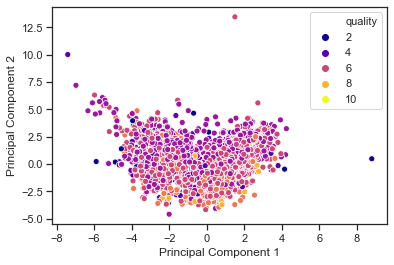

In [ ]:
pal
plt.scatter(x_pca[:,0],x_pca[:,1],c=wine['quality'],palette=pal)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**LDA Analysispart - Quality as label**

In [ ]:
lda = LDA(n_components=2)
lda.fit(norm_wine[D],norm_wine[L])
x_lda =lda.transform(norm_wine[D])

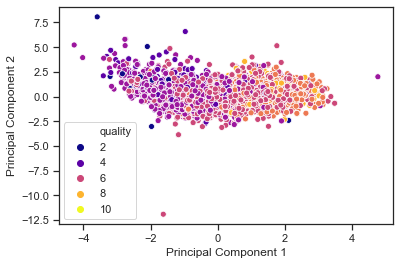

In [ ]:
sns.scatterplot(x_lda[:,0],x_lda[:,1],hue=wine['quality'],palette='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Linear Dimensionality Reduction

### Loading the data

In [ ]:
fea = pd.read_csv("DataB.csv")
fea.shape

(2066, 786)

In [ ]:
#Splitting the data into X and Y
fea.drop(fea.columns[[0]], axis = 1, inplace = True)
X = fea.iloc[:,0:-1]
Y = fea.iloc[:,-1]

In [ ]:
X.shape

(2066, 784)

## Principal Component Analysis (PCA)
### Practical Questions
### Normalisation of the data

In [ ]:
# Defining the palette 
pal={0:"#002db3",1:"#53ff1a",2:"#ffcc33",3:"#ff2500",4:"#602c50"}

In [ ]:
scaler = StandardScaler()
x_scaler = scaler.fit(X)
x_scaler= scaler.transform(X)
x_scaler

array([[ 1.01007711,  0.96678184,  0.35959365, ..., -1.03428476,
         1.04733254,  1.64964331],
       [ 1.68717617, -1.02992387,  1.02648816, ...,  0.30710401,
         1.70203421,  0.98463588],
       [-1.02122007,  0.30121327, -1.64108987, ..., -1.03428476,
        -0.2620708 ,  0.98463588],
       ...,
       [-0.34412101,  0.30121327, -0.30730086, ..., -1.03428476,
        -0.91677248,  0.31962845],
       [ 1.68717617, -0.3643553 ,  1.02648816, ...,  0.9777984 ,
         0.39263087,  0.98463588],
       [ 0.33297805,  0.30121327, -0.97419536, ..., -1.03428476,
         0.39263087, -1.01038641]])

+ **(1)** **Finding Eigenvalues and Eigenvectors and plotting ScreePlot**

##### **Computing Covariance Matrix**

In [ ]:
covar_matrix = np.matmul(x_scaler.T , x_scaler) / (len(x_scaler)-1)
covar_matrix.shape

(784, 784)

##### Computing Eigen Values and Eigen Vectors

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covar_matrix)

In [ ]:
print('Eigen vectors \n%s' %eig_vecs)

Eigen vectors 
[[-0.00197863  0.00493308 -0.00037529 ...  0.00013358 -0.00062295
   0.00157864]
 [-0.00151307 -0.00640373  0.00258725 ... -0.00274212 -0.00837347
  -0.0063992 ]
 [ 0.00049178 -0.00156563 -0.00372451 ... -0.00445827  0.00683485
   0.00181313]
 ...
 [ 0.0001125   0.00300533 -0.00335936 ... -0.00245866 -0.00039547
  -0.00083265]
 [ 0.00132315  0.00947149  0.00553066 ...  0.01026383 -0.01070597
  -0.01537859]
 [-0.00591181  0.00287621  0.00624184 ... -0.00383851 -0.00246361
  -0.00327846]]


In [ ]:
eig_vals1 = pd.DataFrame(eig_vals)

In [ ]:
#Sorting the eigen values in descending order
i = eig_vals.argsort()[::-1]   
eigen_vals_sort = eig_vals[i]
eigen_vals_sort = np.asarray(eigen_vals_sort)
eigen_vecs_sort = eig_vecs[:,i]
eigen_vecs_sort = np.asarray(eigen_vecs_sort)

##### **Scree Plot**

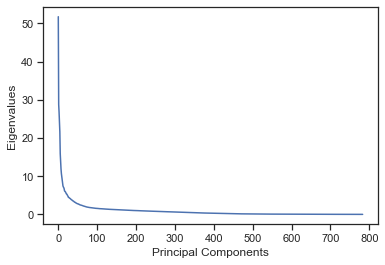

In [ ]:
plt.plot(eigen_vals_sort)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
plt.show()

### Analysis
1. Scree plot gives us the information about the significant eigen values that needs to be retained for the implementation of PCA. Here I have calculated the eigen values and sorted them in descending order and plotted the scree plot. Hence from the above plot we can consider that 40-50 eigen values will be a good cut off.
2. Using this good fit of eigen values we can project out the original data to the new subspace.

+ **(2)** Projection the data with 

**Top 20 Eigen values using PCA()**

In [ ]:
pca = PCA(n_components = 20)
pca.fit(x_scaler)
x_pca =pca.transform(x_scaler)
x_pca

array([[ 9.97069222, -6.18172172, -4.9928635 , ...,  0.20503872,
        -1.4411184 ,  1.22938956],
       [11.41599978, -6.94158667, -5.06302906, ..., -1.06153296,
        -1.00587035, -0.18177528],
       [ 3.69011919, -4.69309768, -2.90865641, ..., -2.60078809,
         1.03139915,  4.8308689 ],
       ...,
       [-0.34942153, -0.93368109,  8.10744201, ...,  1.28505499,
        -1.32849776, -1.00820343],
       [-3.11526327, -2.09047446,  6.27251925, ...,  1.33304133,
        -0.10601169, -1.44210457],
       [-5.64409374,  0.24616622,  4.14018279, ..., -2.81313245,
         1.38953728,  3.31957011]])

**Top 20 Eigen values using the formulation of PCA**

**Sorting Eigen values and Eigen vectors**

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(784,1)))
matrix_w=matrix_w.reshape(784,1)
for i in range(len(eig_pairs[:19])):
    matrix_w=np.hstack((matrix_w,eig_pairs[i+1][1].reshape(784,1)))

In [ ]:
matrix_w.shape

(784, 20)

In [ ]:
transformed = x_scaler.dot(matrix_w)

In [ ]:
transformed = pd.DataFrame(transformed)

In [ ]:
transformed

0         1         2         3         4         5         6  \
0     -9.970692  6.181722 -4.992863  4.394879  2.777870 -2.844761  1.276232   
1    -11.416000  6.941587 -5.063029  4.242178  1.844940 -0.146431  1.683401   
2     -3.690119  4.693097 -2.908656 -3.935094  6.811806 -3.226107  3.662990   
3     -7.312408  6.042886 -3.648012 -3.506919  4.562468 -5.523882  3.971637   
4    -18.061520  1.862436 -4.038834  5.871621  7.322140  4.443076 -2.186078   
...         ...       ...       ...       ...       ...       ...       ...   
2061   1.917926  0.397488  7.951743 -0.162132  2.170046 -2.309800 -3.861676   
2062  -0.525752 -2.646714  9.095319 -0.969272  2.257428  4.547903 -1.437164   
2063   0.349422  0.933681  8.107442 -0.824268  2.814438 -2.822867 -3.678327   
2064   3.115263  2.090474  6.272519  1.529823  0.036308 -2.586437 -2.099663   
2065   5.644094 -0.246167  4.140183 -2.238905  2.477097 -3.198489  2.975116   

             7         8         9        10        11        12        13  \
0     1.463996  6.873987  0.380145 -0.712109  0.760801  0.449508 -0.287800   
1     2.974999  6.208794  1.453125  2.984541  0.062618 -1.030976  1.697475   
2     5.408198  3.404675 -3.016744 -1.025459  2.146708  0.361147 -1.079453   
3     4.891807  6.798005 -1.518705  0.778015  2.513730  0.826844 -2.087150   
4     2.857345  2.555258  1.458920 -3.808408 -3.541443  0.243943  6.566899   
...        ...       ...       ...       ...       ...       ...       ...   
2061 -3.855531  1.341427  1.648366  0.566928 -0.652206  2.498008 -0.405581   
2062 -3.038324 -1.912510 -2.876039  4.002792  3.320094  2.269785 -1.692237   
2063 -3.033837 -1.516991 -0.611697 -1.709401  0.506541  0.087510 -1.110168   
2064 -0.088302  1.460697  1.994810 -0.123076 -0.618949  1.373213  0.855864   
2065  3.481201 -2.807884  0.833956  4.330621 -2.128913 -0.502953 -0.207032   

            14        15        16        17        18        19  
0     3.378486 -0.619362  1.050055 -0.262575  1.425848 -1.162523  
1     3.752078 -0.077418  0.971635  0.963174  1.116552  0.067089  
2    -3.298486 -0.048194  1.217006  2.659070 -0.661096 -5.123715  
3    -1.821332 -0.028662  2.033754  3.356539  1.616812 -3.185084  
4     2.275822 -0.343491  1.215094 -1.591491 -1.032861 -1.995561  
...        ...       ...       ...       ...       ...       ...  
2061  0.760652 -1.306204 -1.995502 -0.478638  0.273882  0.362672  
2062 -0.491064  1.855389  2.377614  3.058803  0.185173 -0.860720  
2063  2.042591  2.496754  2.427592 -1.280868  1.197004  1.081460  
2064  2.180140  1.276780  0.715111 -1.307747 -0.117165  1.593847  
2065 -1.791776 -2.756389 -3.214913  2.847404 -1.148823 -3.394901  

[2066 rows x 20 columns]

**Scatter plot of the projected data with the top 20 eigenvalues**

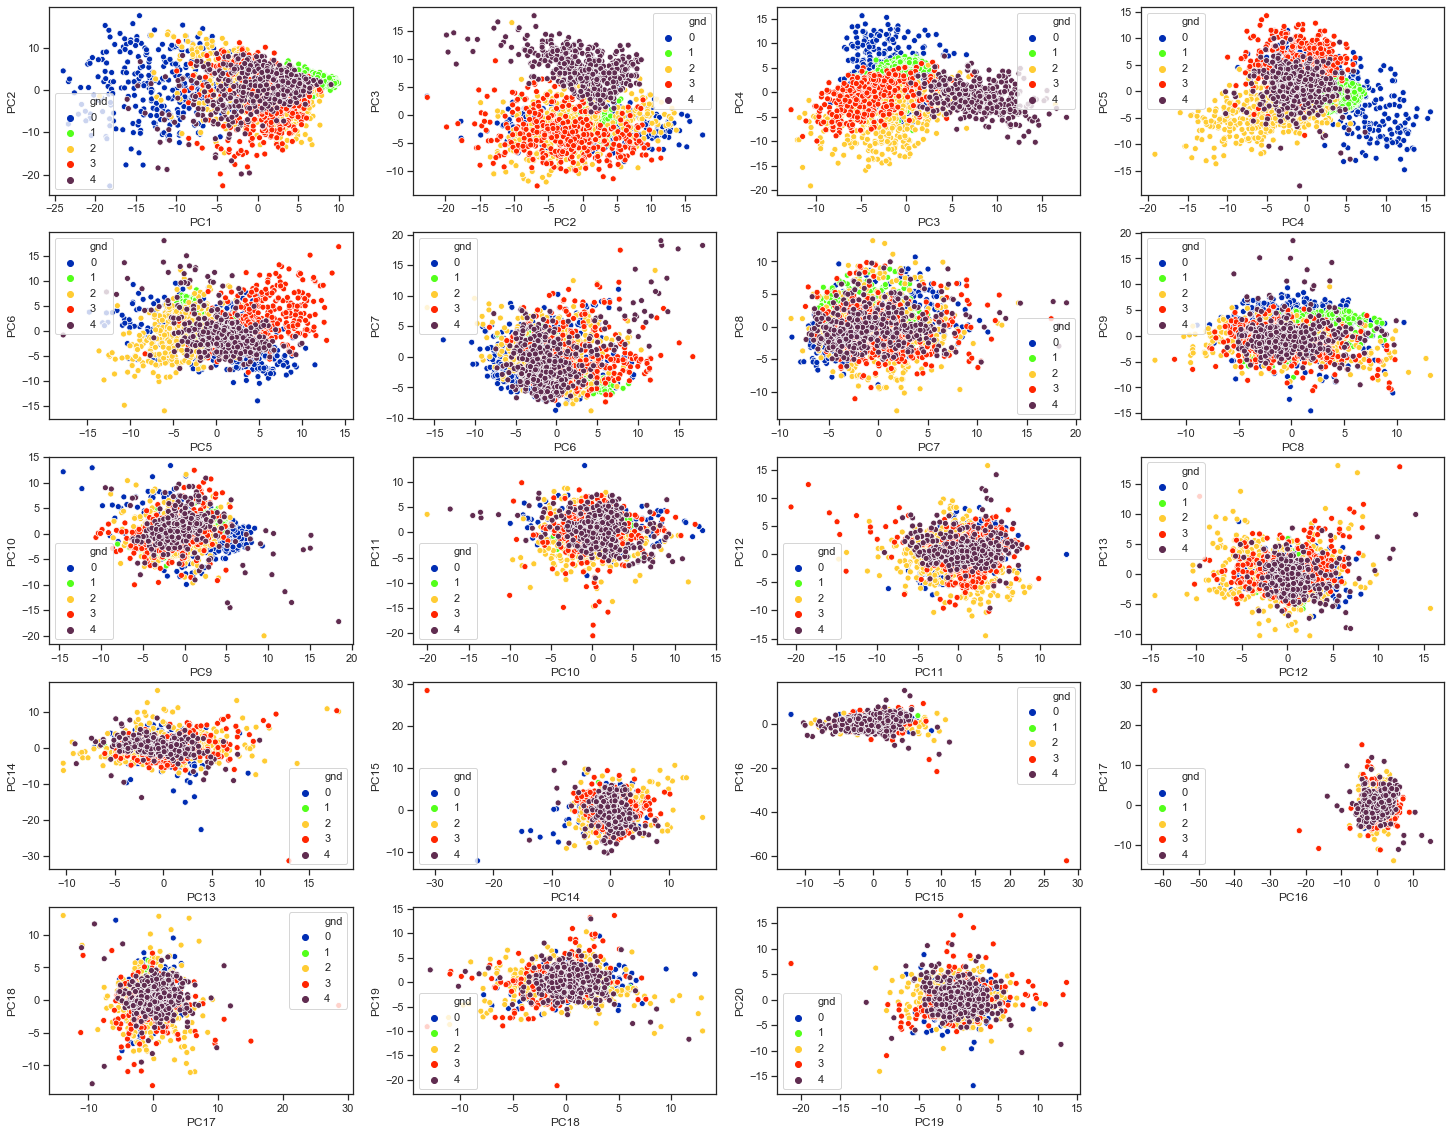

In [ ]:
fig = plt.figure(figsize=(25,20))
for i in range (len(transformed[:19])):
    x=transformed.iloc[:,i]
    y=transformed.iloc[:,i+1]
    xlabel = str(i+1)
    ylabel = str(i+2)
    plt.subplot(5,4,i+1)
    sns.scatterplot(x,y,hue=Y,palette=pal)
    plt.xlabel('PC'+xlabel)
    plt.ylabel('PC'+ylabel)
plt.show()

#### Analysis
1. The scatterplots of the top 20 eigenvalues is plotted. We can observe from the plots that until Principle Component 6 the classification is good and from principle component 7 the classes are not differentiable because there is a lot of overlap of the data points. Hence according to the scatter plots first 6 Eigen values should be a good cutoff.
2.The scree plot helps us identify whether PCA works well on our data and deciding the cutoff based on variance of the dataset in that axis and not on how well the data is classified from each other. Hence by the comparision of scree plot and scatter plot analysis, the cut off from scree plot(50) was higher than that of the scatterplot(6) and as the components increased the data points are grouped in a narrower subspace and the data points overlap. Considering all of these, we can say that considering top 6 eigen values is better than top 50.

+ **(3)** 

**PC1 vs PC2**

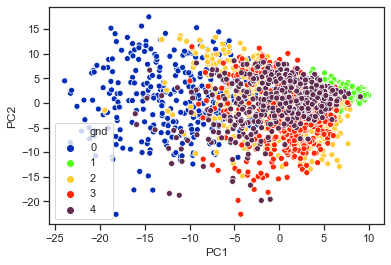

In [ ]:
x=transformed.iloc[:,0]
y=transformed.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**PC5 vs PC6**

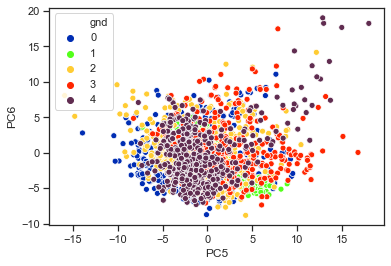

In [ ]:
x=transformed.iloc[:,5]
y=transformed.iloc[:,6]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

### Analysis
1. We can observe from the two plots(PC1 vs PC2 and PC5 vs PC6) that as the principle component number keeps increasing, the overlapping of the data keeps increasing and the classes can't be differentiated.
2. As we sorted the eigenvalues in descending order, we can see that the spread of the data points in PC1 vs PC2  is more when compared to PC5 vs PC6
3. We can also observe that the classes 0,1 and 4 are well classified in PC1, but in other Projected components it overlaps and are not diffentiable.

+  **Implementing PCA and Dual PCA using SVD**

In [ ]:
print(x_scaler.shape)
X_t= x_scaler.transpose()
X_t.shape

(2066, 784)


(784, 2066)

#### PCA using SVD

In [ ]:
%%time
D_DTranspose = np.dot(X_t, X_t.transpose())
#print(D_DTranspose.shape)
eig_vals_1, eig_vecs_1 = np.linalg.eigh(D_DTranspose)
index1 = np.argsort(np.abs(eig_vals_1))[::-1]   
#print(eig_vals_1)
eig_vals_1 = eig_vals_1[index1]
eig_vecs_1 = eig_vecs_1[:,index1]
U_svd = eig_vecs_1
NRows = len(U_svd)
NColumns = len(X.T)
Sig = np.zeros((NRows, NColumns))
for i in range(NRows):
    Sig[i][i] = np.sqrt(eig_vals_1[i])
var = 0
t_sum = sum(eig_vals_1)
n_components = 0
for i in range(len(eig_vals_1)):
    var = var + eig_vals_1[i]
    if (var/t_sum >= 0.95):
        n_components = i
        break
projected_PCA = np.dot(U_svd[:,:20].T,x_scaler.T)
projected_PCA

Wall time: 251 ms


array([[ 9.97069222, 11.41599978,  3.69011918, ..., -0.34942153,
        -3.11526327, -5.64409375],
       [ 6.18172201,  6.94158705,  4.69309729, ...,  0.93368106,
         2.09047425, -0.24616663],
       [-4.99286326, -5.06302886, -2.9086564 , ...,  8.10744188,
         6.27251911,  4.14018317],
       ...,
       [-0.26257488,  0.96317397,  2.65907012, ..., -1.28086781,
        -1.30774666,  2.8474039 ],
       [ 1.42584762,  1.11655238, -0.66109634, ...,  1.19700404,
        -0.11716451, -1.14882287],
       [-1.16252257,  0.06708945, -5.12371489, ...,  1.08146006,
         1.59384718, -3.39490069]])

Dual PCA using SVD

In [ ]:
%%time
D_Transpose = np.dot(X_t.transpose(), X_t)
#print(x_scaler.shape)
#print(D_Transpose.shape)
eig_vals, eig_vecs = np.linalg.eigh(D_Transpose)
index = np.argsort(np.abs(eig_vals))[::-1]   
eig_vals = eig_vals[index]
eig_vecs = eig_vecs[:,index]
V_pca = eig_vecs
#print(V_pca.shape) 
NRows = len(x_scaler)
NColumns = len(V_pca)
Sig = np.zeros((NRows, NColumns))
for i in range(NRows):
    Sig[i][i] = np.sqrt(eig_vals[i])
var = 0
tsum = sum(eig_vals)
n_components = 0
for i in range(len(eig_vals)):
    sum_var = var +eig_vals [i]
    if (var/tsum >= 0.95):
        n_components = i
        break
Projected_DPCA = np.dot(Sig[:20,:], V_pca.T)
Projected_DPCA

Wall time: 2.58 s


C:\Users\15483\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


array([[ 9.97069222, 11.41599978,  3.69011918, ..., -0.34942153,
        -3.11526327, -5.64409375],
       [-6.18172201, -6.94158705, -4.69309729, ..., -0.93368106,
        -2.09047425,  0.24616663],
       [ 4.99286326,  5.06302886,  2.9086564 , ..., -8.10744188,
        -6.27251911, -4.14018317],
       ...,
       [ 0.26257488, -0.96317397, -2.65907012, ...,  1.28086781,
         1.30774666, -2.8474039 ],
       [-1.42584762, -1.11655238,  0.66109634, ..., -1.19700404,
         0.11716451,  1.14882287],
       [ 1.16252257, -0.06708945,  5.12371489, ..., -1.08146006,
        -1.59384718,  3.39490069]])

### ANALYSIS PCA AND DUAL PCA
1. For PCA - CPU times: user 7 µs, sys: 2 µs, total: 9 µs
             Wall time: 18.1 µs
2. For Dual PCA - CPU times: user 14 µs, sys: 4 µs, total: 18 µs
             Wall time: 33.4 µs

- To compute the principal component analysis for the given data set, we compute u which the eigen vector of the data.transpose(data)).We always sort the eigen value along with the corresponding eigen vector in the descending order.Once the u vector is obtained,we project it on the the original data in order to get the pca. 

- To compute dual-pca, we have to compute v which is the eigen vector of transpose(x).x.Sigma is also computed which is the square root of eigen vector.we find sigma.v_transpose to find dual pca which is of a higher dimension,so dual pca always takes more time.when the number of features are more than the number of samples provided then dual PCA works better.We have a huge sample set so PCA works better.

## Linear Discriminant Analysis (LDA)


In [ ]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X, Y)
X_lda = lda.transform(X)
X_lda

Wall time: 1.24 s


array([[-5.27723328, -2.0529124 ,  3.47382341, -1.61351792],
       [-5.91372692, -1.95348169,  3.66530441,  0.18960552],
       [-4.15454288, -0.86888763,  1.17253772,  0.74660534],
       ...,
       [-1.31128997,  5.39808628,  0.2169969 , -1.33361482],
       [ 0.21324713,  5.1609646 , -0.01666172, -0.18685145],
       [ 0.40452267,  4.31739633, -0.31330884,  0.74747194]])

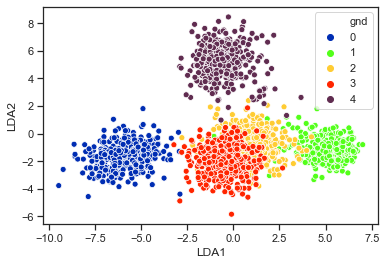

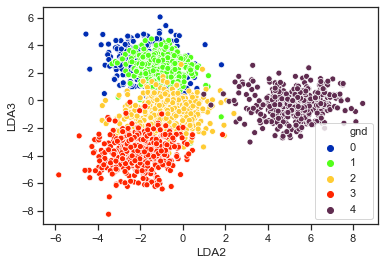

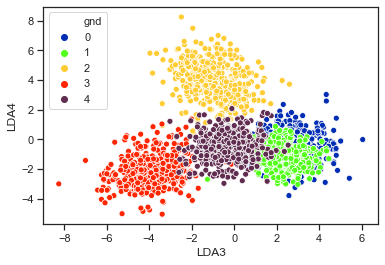

In [ ]:
for i in range(3):
    sns.scatterplot(X_lda[:, i], X_lda[:, i+1], hue =Y,palette = pal)
    x_label = 'LDA' + str(i+1)
    y_label = 'LDA' + str(i+2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


### Analysis-
plot 1 = LDA1 vs LDA2<br>
plot 2 =  LDA2 vs LDA3<br>
plot 3 = LDA3 vs LDA4<br>
From the pairplots obtained, we can analyze that
  -- In plot 1, 0, 1 and 4 are well classified<br>
  -- In plot 2, 3 and 4 are well classified<br>
  -- In plot 3, 2 and 3 are well classified<br>
Considering 0,1,2,3,4 individually<br>
  -- 0 is well classified in plot 1 but overlaps with 1 in other plots<br>
  -- 1 is well classified in plot 1 but overlaps with 0 in other plots<br>
  -- 2 is well classified in plot 3 but overlaps wit other classes in the other plots<br>
  -- 3 is well classified in plot 2 and plot 3 but in plot 1 overlaps with 2<br>
  -- 4 is well classified in all the plots<br>

+ **(2)** **Comparing the results of the LDA with the results obtained by using PCA.**

1. Based on Scatter plot(visual separation)
  -- We can observe that in LDA the data points are very well classified with less overlapping when compared to PCA. Hence      we can say that LDA classifies data better visually.
2. Based on Time
  -- From the wall time obtained we can say that PCA performs faster than LDA and Dual PCA
  -- When a comparision between LDA and Dual PCA, LDA is a better performer. 

# Nonlinear Dimensionality Reduction

### Loading Data

In [ ]:
fea = pd.read_csv("DataB.csv")

In [ ]:
fea.drop(fea.columns[[0]], axis = 1, inplace = True)
X = fea.iloc[:,0:-1]
Y = fea.iloc[:,-1]

 **kernel PCA**

In [ ]:
%%time
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf',random_state =42)
X_transformed = transformer.fit_transform(X)
col_names = ['PC1','PC2']
dArray_kpca = pd.DataFrame(X_transformed,columns=col_names)
dArray_kpca

Wall time: 2.36 s


PC1       PC2
0     0.044795 -0.028970
1    -0.002986  0.001198
2    -0.013929 -0.009832
3    -0.004760  0.002459
4     0.010747 -0.004858
...        ...       ...
2061 -0.001264 -0.000420
2062 -0.001244  0.000908
2063 -0.000697 -0.000054
2064  0.002791  0.000678
2065 -0.002618 -0.000073

[2066 rows x 2 columns]

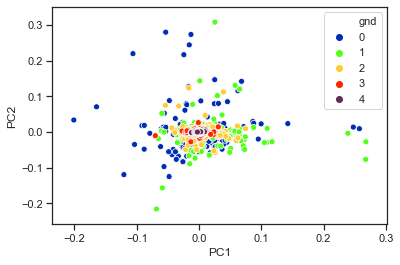

In [ ]:
x=dArray_kpca.iloc[:,0]
y=dArray_kpca.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

 **Isomap**

In [ ]:
%%time
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
col_names = ['PC1','PC2']
X_transformed = embedding.fit_transform(X)
dArray_im = pd.DataFrame(X_transformed,columns=col_names)
dArray_im

Wall time: 16.6 s


PC1          PC2
0      8706.049952  -344.127405
1      8858.821154  -333.866129
2      3954.252089  -926.795027
3      5791.867059  -643.647584
4     10700.083472   281.608819
...            ...          ...
2061  -2332.044810  5245.708873
2062  -3756.861995  4963.734649
2063  -1338.738145  5698.943219
2064  -3704.886240  3550.956273
2065  -3057.390313  3058.272404

[2066 rows x 2 columns]

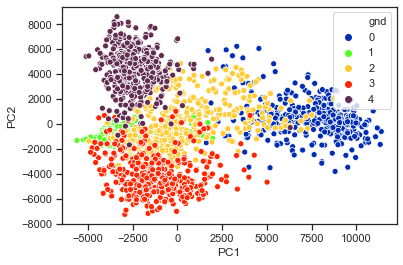

In [ ]:
x=dArray_im.iloc[:,0]
y=dArray_im.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Locally Linear Embedding (LLE)**

In [ ]:
%%time
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,random_state=42)
X_transformed = embedding.fit_transform(X)
dArray_lle = pd.DataFrame(X_transformed,columns=col_names)
dArray_lle

Wall time: 14.8 s


PC1       PC2
0    -0.045258 -0.000862
1    -0.045060 -0.000827
2    -0.044573 -0.000925
3    -0.044700 -0.000871
4    -0.046829 -0.001124
...        ...       ...
2061  0.011558  0.022224
2062  0.011498  0.022210
2063  0.011567  0.022282
2064  0.011554  0.020648
2065  0.011545  0.016289

[2066 rows x 2 columns]

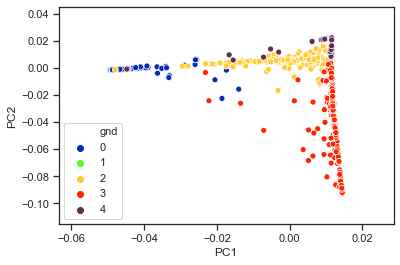

In [ ]:
x=dArray_lle.iloc[:,0]
y=dArray_lle.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Laplacian Eigenmap**

In [ ]:
%%time
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2,random_state=42)
X_transformed = embedding.fit_transform(X)
dArray_le = pd.DataFrame(X_transformed,columns=col_names)
dArray_le

Wall time: 16.7 s


PC1       PC2
0     0.003748 -0.000115
1     0.003848 -0.000155
2     0.002052 -0.000082
3     0.002793  0.000009
4     0.004163 -0.000274
...        ...       ...
2061 -0.000350  0.002717
2062 -0.000684  0.003481
2063 -0.000577  0.003353
2064 -0.000628  0.002263
2065 -0.000943  0.000663

[2066 rows x 2 columns]

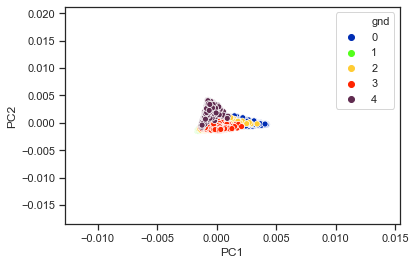

In [ ]:
x=dArray_le.iloc[:,0]
y=dArray_le.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

 **t-SNE**

In [ ]:
%%time
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,random_state=42)
X_transformed = embedding.fit_transform(X)
dArray_tsne = pd.DataFrame(X_transformed,columns=col_names)
dArray_tsne

Wall time: 42.4 s


PC1        PC2
0    -53.996166  -7.566008
1    -54.534958  -8.797090
2    -43.846584  -0.181216
3    -44.933132  -3.096598
4    -60.373814  -7.939509
...         ...        ...
2061   9.319328 -59.859787
2062  -1.245936 -63.650085
2063   2.861093 -48.875607
2064  13.274050 -42.876034
2065  25.875643 -48.847767

[2066 rows x 2 columns]

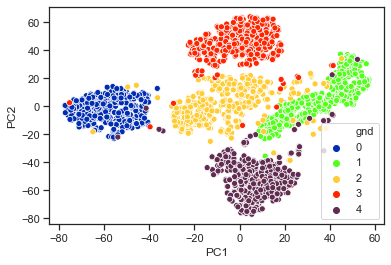

In [ ]:
x=dArray_tsne.iloc[:,0]
y=dArray_tsne.iloc[:,1]
sns.scatterplot(x,y,hue=Y,palette = pal)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Plot and compare

#### ANALYSIS
#### Performance Analysis  (T-SNE IS THE BEST IN TERMS OF CLASSIFICATION)

1. Time Analysis 
    - KernelPCA - Wall time: 2.36 s
    - ISOMAP - Wall time: 16.6 s
    - LLE - Wall time: 14.8 s
    - Laplacian Eigenmap - Wall time: 16.7 s
    - T-SNE - Wall time: 42.4 s  

In terms of time taken,Kernel PCA performs the best,whereas T-SNE takes the maximum time.

2. Classification based on pair plots(visual separation)
   --Based on visual separation, T-SNE is observed to classify the data the best. We can see a clear demarcation of classes      in   T-SNE.<br>
   --LLE follows T-SNE and then Isomap<br>
   --KernelPCA has a lot of overlapping and laplacian eigen map provides a bad classification.<br>

3. Variance
   --The spread of datapoints when considered, isomap has the highest variance.<br>
   --The variance for KernelPCA, LLE and Laplacian are very less and hence are difficult to classify.